Init Plugin
Init Graph Optimizer
Init Kernel


/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.7.0 and strictly below 2.10.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.5.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


Metal device set to: Apple M1


2022-08-18 10:39:21.883965: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-18 10:39:21.884115: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-08-18 10:39:22.109847: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-08-18 10:39:22.112464: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/100
   1/1589 [..............................] - ETA: 13:34 - loss: 158.1575 - r_square: -4.1229

2022-08-18 10:39:22.447580: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1589/1589 [==============================] - ETA: 0s - loss: 55.7324 - r_square: 0.1774

2022-08-18 10:39:37.161684: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1589/1589 [==============================] - 16s 10ms/step - loss: 55.7324 - r_square: 0.1774 - val_loss: 50.7003 - val_r_square: 0.3138
Epoch 2/100
1589/1589 [==============================] - 15s 9ms/step - loss: 51.8309 - r_square: 0.2806 - val_loss: 52.0259 - val_r_square: 0.2517
Epoch 3/100
1589/1589 [==============================] - 15s 10ms/step - loss: 50.9670 - r_square: 0.3012 - val_loss: 50.7249 - val_r_square: 0.2920
Epoch 4/100
1589/1589 [==============================] - 15s 9ms/step - loss: 50.3411 - r_square: 0.3164 - val_loss: 48.4657 - val_r_square: 0.3749
Epoch 5/100
1589/1589 [==============================] - 15s 9ms/step - loss: 49.9209 - r_square: 0.3264 - val_loss: 48.2161 - val_r_square: 0.3663
Epoch 6/100
1589/1589 [==============================] - 15s 9ms/step - loss: 49.4630 - r_square: 0.3373 - val_loss: 48.4696 - val_r_square: 0.3541
Epoch 7/100
1589/1589 [==============================] - 15s 9ms/step - loss: 49.0847 - r_square: 0.3457 - val_loss: 47.87

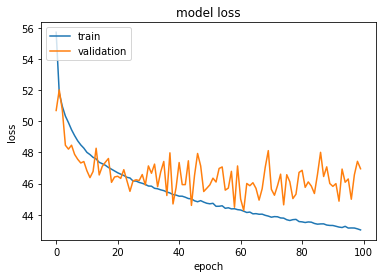

2022-08-18 11:24:47.703621: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


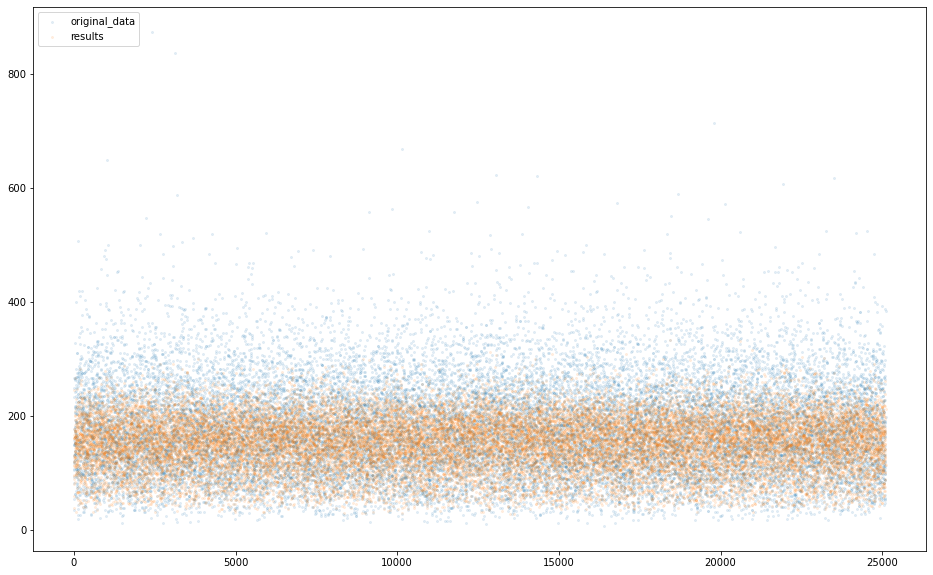

In [2]:
import tensorflow as tf
from tensorflow import initializers
import numpy as np
import pandas as pd
import tensorflow_addons as tfa
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight


# variables
n = 5 # number of variables per binomial
b = 5 # number of binomials

df = pd.read_csv("test1.csv")
answers = pd.read_csv('/Users/erickang/Documents/Research/Data/RandomBinomialDataSet.5vars.deg15.5binomialsEach.gbSizes.txt', header=None)

X = np.array(df)
y = np.array(answers)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)


X_train=tf.convert_to_tensor(X_train)
X_train=tf.reshape(X_train, [-1, b, 2, n])

X_test=tf.convert_to_tensor(X_test)
X_test=tf.reshape(X_test, [-1, b, 2, n])

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(300, (2,2), 
                                 input_shape = X_train.shape[1:], 
                                 kernel_initializer=initializers.RandomNormal(stddev=0.1),
                                 bias_initializer=initializers.Constant(0.1),
                                 activation=tf.nn.relu))
#model.add(tf.keras.layers.Conv2D(64, (1,2), activation=tf.nn.relu, data_format = 'channels_first'))
model.add(tf.keras.layers.Dropout(.5))


model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(500,
                                kernel_initializer=initializers.RandomNormal(stddev=0.1),
                                 bias_initializer=initializers.Constant(0.1),
                                activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(.5))
model.add(tf.keras.layers.Dense(500,
                                kernel_initializer=initializers.RandomNormal(stddev=0.1),
                                 bias_initializer=initializers.Constant(0.1),
                                activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(.5))

model.add(tf.keras.layers.Dense(1, activation=tf.nn.relu))

model.compile(optimizer='adam',
             loss='log_cosh',
             metrics=[tfa.metrics.RSquare(dtype=tf.float32)])

history = model.fit(X_train, y_train, 
                    #sample_weight=pd.Series(sample_weights),
                    batch_size=128, epochs = 100, validation_split=0.1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

output = model.predict(X_test)
x_axis = range(y_test.size)

plt.figure(figsize=(16,10))
plt.scatter(x_axis, y_test, label = "original_data", alpha=0.1, s=4)
plt.scatter(x_axis, output, label = "results", alpha=0.1, s=4)
plt.legend(loc="upper left")
plt.show()

[[ -46.15699768]
 [ -20.41784668]
 [ -71.28160095]
 ...
 [  73.91889954]
 [ -84.02346039]
 [-172.05540466]]


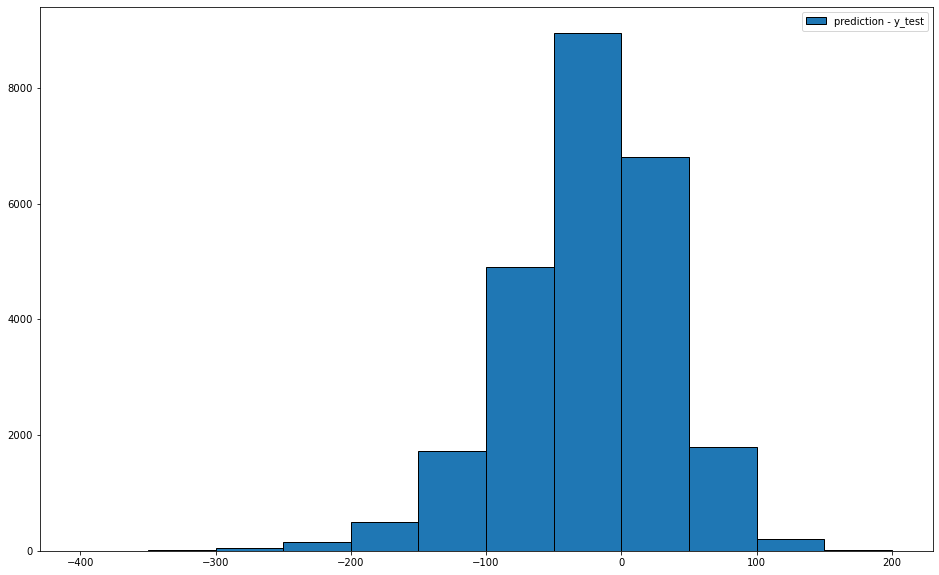

In [3]:
estimate_delta = output - y_test
print(estimate_delta)

plt.figure(figsize=(16,10))
plt.hist(estimate_delta, bins=12, range=(-400,200), edgecolor='black', label='prediction - y_test')
plt.legend()

In [14]:
print(x_axis)

range(0, 25100)


Epoch 1/100
  4/199 [..............................] - ETA: 3s - loss: 15.8591 - r_square: -2.5669 

2022-08-18 11:32:41.663934: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


199/199 [==============================] - ETA: 0s - loss: 6.1861 - r_square: -0.1390

2022-08-18 11:32:44.715541: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


199/199 [==============================] - 3s 16ms/step - loss: 6.1861 - r_square: -0.1390 - val_loss: 14.4958 - val_r_square: -1.5950
Epoch 2/100
199/199 [==============================] - 3s 15ms/step - loss: 4.8732 - r_square: 0.0532 - val_loss: 12.9012 - val_r_square: -1.2365
Epoch 3/100
199/199 [==============================] - 3s 15ms/step - loss: 4.5621 - r_square: 0.0879 - val_loss: 11.6337 - val_r_square: -0.9789
Epoch 4/100
199/199 [==============================] - 3s 15ms/step - loss: 4.4226 - r_square: 0.1029 - val_loss: 11.4758 - val_r_square: -0.9413
Epoch 5/100
199/199 [==============================] - 3s 15ms/step - loss: 4.3354 - r_square: 0.1121 - val_loss: 10.2260 - val_r_square: -0.7203
Epoch 6/100
199/199 [==============================] - 3s 15ms/step - loss: 4.2988 - r_square: 0.1183 - val_loss: 10.1218 - val_r_square: -0.7013
Epoch 7/100
199/199 [==============================] - 3s 15ms/step - loss: 4.2546 - r_square: 0.1223 - val_loss: 9.9062 - val_r_square

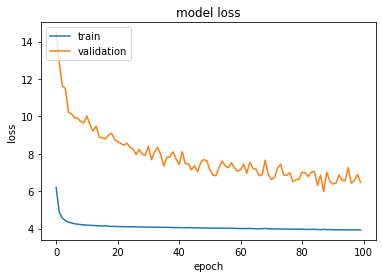

2022-08-18 11:37:38.685224: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


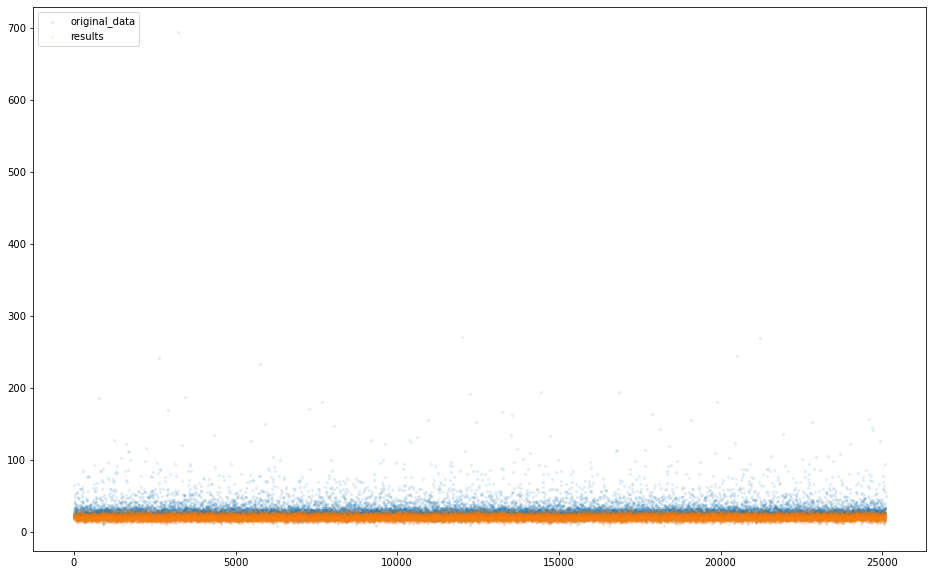

[[ -3.78087425]
 [ -2.67987251]
 [-39.0913868 ]
 ...
 [-13.00913048]
 [ -5.48007584]
 [-27.14112282]]


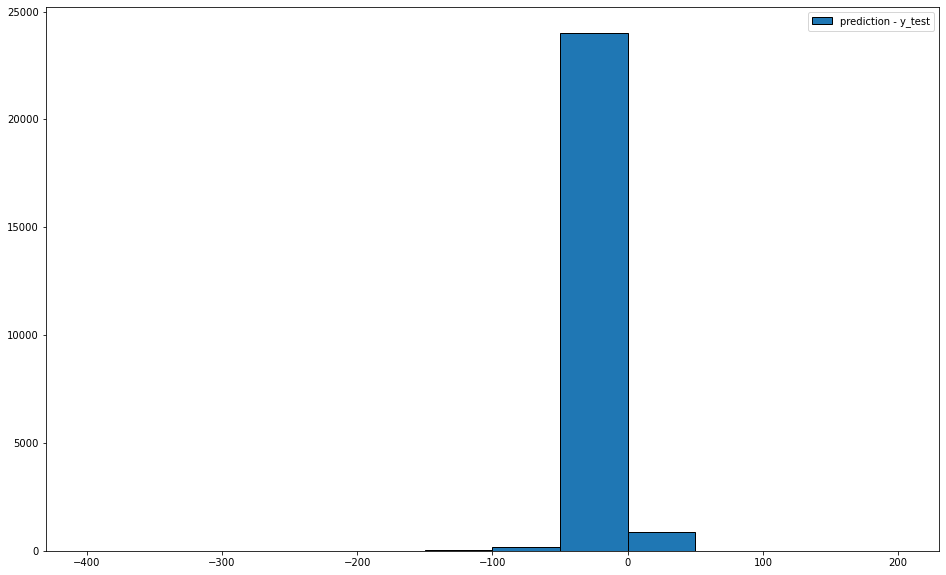

In [4]:
import tensorflow as tf
from tensorflow import initializers
import numpy as np
import pandas as pd
import tensorflow_addons as tfa
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight


# variables
n = 5 # number of variables per binomial
b = 5 # number of binomials

df = pd.read_csv("test1.csv")
answers = pd.read_csv('/Users/erickang/Documents/Research/Data/RandomBinomialDataSet.5vars.deg15.5binomialsEach.gbMaxDeg.txt', header=None)

X = np.array(df)
y = np.array(answers)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)


X_train=tf.convert_to_tensor(X_train)
X_train=tf.reshape(X_train, [-1, b, 2, n])

X_test=tf.convert_to_tensor(X_test)
X_test=tf.reshape(X_test, [-1, b, 2, n])

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(300, (2,2), 
                                 input_shape = X_train.shape[1:], 
                                 kernel_initializer=initializers.RandomNormal(stddev=0.1),
                                 bias_initializer=initializers.Constant(0.1),
                                 activation=tf.nn.relu))
#model.add(tf.keras.layers.Conv2D(64, (1,2), activation=tf.nn.relu, data_format = 'channels_first'))
model.add(tf.keras.layers.Dropout(.5))


model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(500,
                                kernel_initializer=initializers.RandomNormal(stddev=0.1),
                                 bias_initializer=initializers.Constant(0.1),
                                activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(.5))
model.add(tf.keras.layers.Dense(500,
                                kernel_initializer=initializers.RandomNormal(stddev=0.1),
                                 bias_initializer=initializers.Constant(0.1),
                                activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(.5))

model.add(tf.keras.layers.Dense(1, activation=tf.nn.relu))

model.compile(optimizer='adam',
             loss='log_cosh',
             metrics=[tfa.metrics.RSquare(dtype=tf.float32)])

history = model.fit(X_train, y_train, 
                    #sample_weight=pd.Series(sample_weights),
                    batch_size=1024, epochs = 100, validation_split=0.1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

output = model.predict(X_test)
x_axis = range(y_test.size)

plt.figure(figsize=(16,10))
plt.scatter(x_axis, y_test, label = "original_data", alpha=0.1, s=4)
plt.scatter(x_axis, output, label = "results", alpha=0.1, s=4)
plt.legend(loc="upper left")
plt.show()

estimate_delta = output - y_test
print(estimate_delta)

plt.figure(figsize=(16,10))
plt.hist(estimate_delta, bins=12, range=(-400,200), edgecolor='black', label='prediction - y_test')
plt.legend()

In [5]:
from tensorflow.keras import backend as K
get_final_layer_output = K.function([model.layers[0].input], [model.layers[3].output])
a = get_final_layer_output([X_train])[0]
results = np.asarray(a)

count = 0
for result in range(900000):
    if abs(results[result] - y[result]) <= 50:
        count += 1

print(count)
print(count/900000)

ResourceExhaustedError: OOM when allocating tensor with shape[225900,64,1,127] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator Simple allocator [Op:Conv2D]

In [1]:
print(output)

NameError: name 'output' is not defined

In [46]:
X_test=tf.convert_to_tensor(X_test)
X_test=tf.reshape(X_test, [-1, 2, b, n])

y_test_predict = model.predict(X_test)

count = 0
for index in range(len(y_test_predict)):
    if abs(y_test_predict[index] - y_test[index]) <= .1*y_test_predict[index]:
        count += 1
        
print(count)
print(count/len(y_test_predict))     

27703
0.27703


In [11]:
X_train=tf.reshape(X_train, [-1, 2, b, n])
print(X_train)


tf.Tensor(
[[[[ 2  1  4  8  0]
   [ 2  0  4  2  7]
   [ 1  3  2  9  0]
   [ 0  2  6  3  4]
   [ 3  1  1 10  0]]

  [[ 7  0  0  5  3]
   [ 0  1 12  1  1]
   [ 3  1  6  2  3]
   [ 3  4  3  4  1]
   [ 5  2  1  1  6]]]


 [[[12  1  1  1  0]
   [ 1  3  4  5  2]
   [ 1  4  7  3  0]
   [ 0  1  1  3 10]
   [ 1  0  5  9  0]]

  [[10  1  2  0  2]
   [ 5  7  1  1  1]
   [ 1  8  3  2  1]
   [ 5  4  0  5  1]
   [11  0  2  0  2]]]


 [[[ 5  5  5  0  0]
   [ 1  0  5  8  1]
   [ 0  9  3  3  0]
   [ 2  1  3  4  5]
   [ 0  1 12  1  1]]

  [[ 0  0  0  9  6]
   [ 8  3  1  0  3]
   [ 2  7  0  0  6]
   [ 2  1  0  8  4]
   [ 5  0  2  1  7]]]


 ...


 [[[ 6  1  6  2  0]
   [ 2  6  1  2  4]
   [ 4  0  5  6  0]
   [ 5  6  3  0  1]
   [ 1  5  1  7  1]]

  [[ 0  9  2  0  4]
   [ 3  4  6  0  2]
   [ 7  1  0  2  5]
   [ 1  1  9  1  3]
   [ 0  3  5  2  5]]]


 [[[ 3  5  5  2  0]
   [ 0  1  3  2  9]
   [ 5  2  6  1  1]
   [ 2  0 10  0  3]
   [ 3  1  5  4  2]]

  [[ 0  5  5  1  4]
   [ 4  3  4  1  3]
   [ 1  1  3  0 

In [5]:
model.save_weights('./tensors')

ValueError: Found array with dim 4. Estimator expected <= 2.